# Proyek Analisis Data: Bike-sharing Dataset
- **Nama:** Era Syafina
- **Email:** erasyafina025@gmail.com
- **ID Dicoding:** ersyafin

## Menentukan Pertanyaan Bisnis

Sejauh mana musim memengaruhi jumlah penyewaan sepeda?

Bagaimana pola berdasarkan waktu seperti jam, bulan, dan tahun berdampak pada tingkat penyewaan sepeda?

Apa efek kondisi cuaca terhadap permintaan penyewaan sepeda?

Apakah terdapat perbedaan signifikan dalam penyewaan sepeda antara hari kerja dan akhir pekan?

Bagaimana pola penyewaan sepeda berubah saat hari libur dibandingkan hari biasa?
Seberapa besar pengaruh faktor lingkungan seperti suhu (temp), suhu yang dirasakan (atemp), kelembaban (humidity), dan kecepatan angin (windspeed) terhadap penyewaan sepeda?

Bagaimana tren penggunaan sepeda dalam setahun? Apakah jumlah penyewaan lebih tinggi di tahun 2011 atau 2012?

## Import Semua Packages/Library yang Digunakan

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat dataset bike-sharing (day)**

In [95]:
df_day = pd.read_csv('/content/day.csv')
print(df_day.shape)
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [96]:
df_hour = pd.read_csv('/content/hour.csv')
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset terdiri dari dua file:
1. hour.csv (data penyewaan per jam) dan memiliki jumlah 17379 baris dan 17 kolom

2. day.csv (data penyewaan per hari) dan memiliki jumlah 731 baris dan 16 kolom

Deskripsi Fitur:
- instant: Indeks data
- dteday: Tanggal
- season: Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)
- yr: Tahun (0: 2011, 1: 2012)
- mnth: Bulan (1-12)
- hr: Jam (0-23, hanya dalam hour.csv)
- holiday: Hari libur atau bukan
- weekday: Hari dalam seminggu
- workingday: Hari kerja atau bukan
- weathersit: Kondisi cuaca
- temp: Suhu terukur (dalam skala normalisasi)
- atemp: Suhu yang dirasakan (dalam - skala normalisasi)
- hum: Kelembaban udara (dalam skala normalisasi)
- windspeed: Kecepatan angin (dalam skala normalisasi)
- casual: Jumlah pengguna non-terdaftar
- registered: Jumlah pengguna terdaftar
- cnt: Total jumlah penyewaan

### Assessing Data

**Menilai Data df_day**

In [97]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [98]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**

* Jika kita perhatikan, jumlah data pada df_day telah lengkap atau dengan kata lain tidak ada missing value didalamnya.
* Terdapat kesalahan tipe data yang tidak sesuai seperti kolom dteday yang bertipe data object yang seharusnya bertipe data datetime.

In [99]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah nama kolom supaya dapat di pahami dengan mudah (modifikasi kolom)

In [100]:
df_day.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'cnt':'count'
    },inplace=True)

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

Menggantikan  kolom yang bertipe data dari int64 menjadi tipe data categorical, tujuannya untuk mudah dianalisis terutama dalam eksplorasi data, berikut kolom-kolom yang disarankan untuk dikonversi tipe data ke categorical
* season
* year
* month
* hour
* holiday
* weekday
* workingday
* wheater_condition


In [101]:
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
df_day[categorical_columns] = df_day[categorical_columns].astype('category')

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [102]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


**Menilai Data df_hour**

In [103]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [104]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**

* Jika kita perhatikan, jumlah data pada df_hour telah lengkap atau dengan kata lain tidak ada missing value didalamnya.
* Terdapat kesalahan tipe data yang tidak sesuai seperti kolom dteday yang bertipe data object yang seharusnya bertipe data datetime.

In [105]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengubah nama kolom supaya dapat di pahami dengan mudah (modifikasi kolom)

In [106]:
df_hour.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'cnt':'count'
    },inplace=True)

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

Menggantikan  kolom yang bertipe data dari int64 menjadi tipe data categorical, tujuannya untuk mudah dianalisis terutama dalam eksplorasi data, berikut kolom-kolom yang disarankan untuk dikonversi tipe data ke categorical
* season
* year
* month
* hour
* holiday
* weekday
* workingday
* wheater_condition


In [107]:
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
df_hour[categorical_columns] = df_hour[categorical_columns].astype('category')

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   workingday         17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [108]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Setelah memastikan tidak ada missing value atau duplikasi pada `df_hour` dan `df_day`, langkah selanjutnya adalah menggabungkan kedua tabel, lalu mengecek kembali keberadaan missing value serta duplikasi, di mana `df_hour` berisi data per jam dan `df_day` merupakan agregasi hariannya, yang memiliki total count, registered, dan casual dengan nilai yang sesuai.

Ketika data di `df_hour` dikelompokkan berdasarkan tanggal (`datetime`), jumlah `count`, `registered`, dan `casual` akan sesuai dengan nilai yang tercatat di `df_day`.

In [109]:
df_hour.groupby('date').agg({'count': 'sum'})

,count
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


Jumlah hari pada **hour_df** dan **day_df** dapat dibandingkan, menunjukkan bahwa keduanya memiliki rentang waktu yang sama, yaitu **731 baris (hari)** dari **1 Januari 2011 hingga 31 Desember 2012**.

In [110]:
bike_sharing_df = df_day.merge(df_hour[['date', 'hour']], on='date', how='inner')
print(f"Dataset hasil merge memiliki {bike_sharing_df.shape[0]} baris dan {bike_sharing_df.shape[1]} kolom.")

Dataset hasil merge memiliki 17379 baris dan 17 kolom.


Kita melakukan penggabungan **hour_df** dan **day_df** menggunakan **inner join**, yaitu metode yang hanya menyertakan data yang cocok di kedua tabel. Dalam proses ini, **day_df** digabungkan dengan bagian tertentu dari **hour_df** berdasarkan kolom **datetime** sebagai kunci utama.  

Pada **hour_df**, kita hanya mengambil kolom **datetime** dan **hour** untuk memastikan relevansi data yang digabungkan.  
Alasan penggabungan ini adalah karena **hour_df** berisi data per jam, sedangkan **day_df** mencakup data harian. Kedua tabel memiliki kesamaan dalam data, dengan perbedaan utama terletak pada kolom **hour** yang hanya terdapat di **hour_df**.

In [111]:
bike_sharing_df.info()
bike_sharing_df.loc[bike_sharing_df["date"].isnull()]
bike_sharing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Kode ini memeriksa apakah ada nilai **Null** di kolom `date` dan menampilkan hasilnya, lalu menampilkan 5 baris pertama dari `bike_sharing_df` untuk memastikan data telah tergabung dengan benar.

In [112]:
bike_sharing_df.isnull().sum()

,0
instant,0
date,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weather_condition,0
temp,0


Tidak ada missing value

In [113]:
print("Jumlah duplikasi: ", bike_sharing_df.duplicated().sum())

Jumlah duplikasi:  0


In [114]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

Kita akan menyesuaikan nilai pada kolom **weekday** agar lebih informatif dengan mengganti angka menjadi nama hari sesuai dengan ketentuan dalam dataset.

In [115]:
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].cat.rename_categories({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
bike_sharing_df['weekday'].unique()


['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday']

In [116]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Kita akan mengubah nilai numerik pada kolom **"month"** menjadi nama bulan agar lebih mudah dibaca dan dianalisis.

In [117]:
bike_sharing_df["month"] = bike_sharing_df["month"].replace({
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
})

<ipython-input-117-dadfabd7da89>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bike_sharing_df["month"] = bike_sharing_df["month"].replace({


In [118]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Kita akan mengganti nilai numerik pada kolom **season** dengan nama musim yang sesuai agar lebih informatif.

In [119]:
bike_sharing_df['season'] = bike_sharing_df['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
bike_sharing_df['season'].unique()


<ipython-input-119-7ee69e9355a7>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bike_sharing_df['season'] = bike_sharing_df['season'].replace({


['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

In [120]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Kode ini mengubah nilai kategori pada kolom **year** dari bentuk numerik (0 dan 1) menjadi tahun sebenarnya (2011 dan 2012).

In [121]:
# Mengonversi nilai pada kolom 'year' ke format tahun yang sebenarnya
bike_sharing_df['year'] = bike_sharing_df['year'].replace({0: 2011, 1: 2012}).astype('category')
bike_sharing_df['year'].unique()

<ipython-input-121-356db5ec9702>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bike_sharing_df['year'] = bike_sharing_df['year'].replace({0: 2011, 1: 2012}).astype('category')


[2011, 2012]
Categories (2, int64): [2011, 2012]

In [122]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Mengubah nilai kategori pada kolom **weather_condition** dari angka menjadi deskripsi cuaca yang lebih jelas.

In [123]:
# Mengonversi nilai kategori pada kolom 'weather_condition' ke deskripsi cuaca yang lebih mudah dipahami
weather_mapping = {1: 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Storm'}
bike_sharing_df['weather_condition'] = bike_sharing_df['weather_condition'].replace(weather_mapping).astype('category')
bike_sharing_df['weather_condition'].unique()

<ipython-input-123-5eb71bf52ae9>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bike_sharing_df['weather_condition'] = bike_sharing_df['weather_condition'].replace(weather_mapping).astype('category')


['Mist & Cloudy', 'Clear', 'Light Snow/Rain']
Categories (3, object): ['Clear', 'Mist & Cloudy', 'Light Snow/Rain']

In [124]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Mengubah nilai pada kolom **holiday** day dari angka menjadi label deskriptif, di mana 0 menjadi "Non-holiday Day" dan 1 menjadi "Holiday" untuk mempermudah analisis data.

In [125]:
# Mengubah nilai kategori pada kolom 'workingday' menjadi label yang lebih jelas
bike_sharing_df['holiday'] = bike_sharing_df['holiday'].cat.rename_categories({
    0: 'Non-holiday Day',
    1: 'Holiday Day'
})
# Menampilkan kategori unik setelah perubahan
bike_sharing_df['holiday'].unique()

['Non-holiday Day', 'Holiday Day']
Categories (2, object): ['Non-holiday Day', 'Holiday Day']

In [126]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,4


Mengubah nilai pada kolom **workingday** dari angka menjadi label deskriptif, di mana 0 menjadi "Non-Working Day" dan 1 menjadi "Working Day" untuk mempermudah analisis data.

In [127]:
# Mengubah nilai kategori pada kolom 'workingday' menjadi label yang lebih jelas
bike_sharing_df['workingday'] = bike_sharing_df['workingday'].cat.rename_categories({
    0: 'Non-Working Day',
    1: 'Working Day'
})
# Menampilkan kategori unik setelah perubahan
bike_sharing_df['workingday'].unique()

['Non-Working Day', 'Working Day']
Categories (2, object): ['Non-Working Day', 'Working Day']

In [128]:
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,Non-Working Day,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,Non-Working Day,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,Non-Working Day,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,Non-Working Day,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Spring,2011,January,Non-holiday Day,Saturday,Non-Working Day,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,4


menampilkan nilai unik dari beberapa kolom kategorikal dalam bike_sharing_df, seperti season, year, holiday, workingday, weekday, dan weather_condition, untuk memastikan bahwa data telah dikonversi dengan benar.

In [129]:
print("Unique Values in bike_sharing_df:")
for col in ["season", "year", "holiday", "workingday", "weekday", "weather_condition"]:
    print(f"{col:<18}: {bike_sharing_df[col].unique()}")

Unique Values in bike_sharing_df:
season            : ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
year              : [2011, 2012]
Categories (2, int64): [2011, 2012]
holiday           : ['Non-holiday Day', 'Holiday Day']
Categories (2, object): ['Non-holiday Day', 'Holiday Day']
workingday        : ['Non-Working Day', 'Working Day']
Categories (2, object): ['Non-Working Day', 'Working Day']
weekday           : ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday']
weather_condition : ['Mist & Cloudy', 'Clear', 'Light Snow/Rain']
Categories (3, object): ['Clear', 'Mist & Cloudy', 'Light Snow/Rain']


## Exploratory Data Analysis (EDA)

 **Explore `bike_sharing_df`**

In [130]:
bike_sharing_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,17379.000000,17379,17379,17379.0,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,May,Non-holiday Day,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,16879,2512,11865,11040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,11.546752
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,185.000000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,6.000000
50%,367.000000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,12.000000
75%,549.000000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,18.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000


Menganalisis sebaran dan frekuensi data pada kolom kategorikal seperti **season, year, month, holiday, workingday, weekday,** dan **weather_condition** untuk memahami pola dan proporsi tiap kategori dalam dataset.

In [131]:
# Menampilkan distribusi data kategorikal dalam bike_sharing_df
categories = ['season', 'year', 'month', 'holiday', 'workingday', 'weekday', 'weather_condition']

print("Distribusi Data Kategorikal pada bike_sharing_df\n")
for category in categories:
    print(f"{category.capitalize()}:\n{bike_sharing_df[category].value_counts().sort_index()}\n")

Distribusi Data Kategorikal pada bike_sharing_df

Season:
season
Spring    4242
Summer    4409
Fall      4496
Winter    4232
Name: count, dtype: int64

Year:
year
2011    8645
2012    8734
Name: count, dtype: int64

Month:
month
January      1429
February     1341
March        1473
April        1437
May          1488
June         1440
July         1488
August       1475
September    1437
October      1451
November     1437
December     1483
Name: count, dtype: int64

Holiday:
holiday
Non-holiday Day    16879
Holiday Day          500
Name: count, dtype: int64

Workingday:
workingday
Non-Working Day     5514
Working Day        11865
Name: count, dtype: int64

Weekday:
weekday
Sunday       2502
Monday       2479
Tuesday      2453
Wednesday    2475
Thursday     2471
Friday       2487
Saturday     2512
Name: count, dtype: int64

Weather_condition:
weather_condition
Clear              11040
Mist & Cloudy       5871
Light Snow/Rain      468
Name: count, dtype: int64



Untuk melihat **hubungan antara musim dan jumlah penyewa sepeda**, kita dapat mengelompokkan data berdasarkan musim dan menghitung total penyewa casual, registered, serta total sepeda yang disewa.

In [132]:
seasonal_rentals = bike_sharing_df.groupby('season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
}).reset_index()

seasonal_rentals

<ipython-input-132-405b420c0ef9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = bike_sharing_df.groupby('season').agg({


,season,casual,registered,count
0,Spring,1440508,9738639,11179147
1,Summer,4880685,17143386,22024071
2,Fall,5413876,20006927,25420803
3,Winter,3112501,17054528,20167029


Pada musim panas dan gugur, jumlah total penyewa sepeda mencapai puncaknya, dengan 22.024.071 sepeda disewa di musim panas dan 25.420.803 sepeda di musim gugur, sedangkan pada musim semi dan dingin jumlah total penyewa lebih rendah, masing-masing 11.791.147 dan 20.167.029 sepeda disewa.

Untuk melihat **hubungan antara bulan dan jumlah penyewa sepeda**, kita dapat mengelompokkan data berdasarkan kolom month dan menghitung nilai maksimum, minimum, rata-rata, serta total jumlah penyewaan sepeda (count) setiap bulannya.

In [133]:
monthly_rentals = bike_sharing_df.groupby('month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

monthly_rentals

<ipython-input-133-a21135fc6785>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = bike_sharing_df.groupby('month').agg({


count                            
            max   min         mean      sum
month                                      
January    4521   431  2228.370189  3184341
February   5062  1005  2671.260999  3582161
March      8362   605  3709.164969  5463600
April      7460   795  4484.418928  6444110
May        8294  2633  5349.774194  7960464
June       8120  3767  5772.366667  8312208
July       8173  3285  5563.677419  8278752
August     7865  1115  5689.239322  8391628
September  8714  1842  5772.107864  8294519
October    8156    22  5319.965541  7719270
November   6852  1495  4245.956159  6101439
December   6606   441  3411.030344  5058558

Penyewaan sepeda mencapai puncaknya pada bulan September dengan total 8,714 sepeda disewa, sedangkan bulan Oktober mencatatkan penyewaan terendah dengan hanya 22 sepeda disewa, dan total penyewaan sepeda tertinggi tercatat pada bulan Juni dengan 8,312,208 sepeda disewa.

Untuk melihat **hubungan antara jam dan jumlah penyewa sepeda**, kita dapat mengelompokkan data berdasarkan hour dan menghitung nilai maksimum, minimum, rata-rata, serta total penyewaan sepeda per jam.

In [134]:
hourly_rentals = bike_sharing_df.groupby('hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

hourly_rentals

count                           
       max  min         mean      sum
hour                                 
0     8714   22  4524.359504  3284685
1     8714  441  4533.084254  3281953
2     8714  441  4561.169231  3261236
3     8714  441  4615.865136  3217258
4     8714  441  4642.246772  3235646
5     8714  441  4565.804742  3273682
6     8714  441  4531.057931  3285017
7     8714  441  4526.061898  3290447
8     8714  441  4526.061898  3290447
9     8714  441  4526.061898  3290447
10    8714  441  4526.061898  3290447
11    8714  441  4526.061898  3290447
12    8714  441  4520.782967  3291130
13    8714  441  4516.085048  3292226
14    8714  441  4516.085048  3292226
15    8714  441  4516.085048  3292226
16    8714  431  4510.489041  3292657
17    8714  431  4510.489041  3292657
18    8714  431  4520.653846  3291036
19    8714  431  4520.653846  3291036
20    8714  431  4520.653846  3291036
21    8714  431  4520.653846  3291036
22    8714  431  4520.653846  3291036
23    8714  431  4520.653846  3291036

Berdasarkan hasil di atas, dapat disimpulkan bahwa jam dengan jumlah penyewaan sepeda terbanyak terjadi pada **pukul 16:00 (4 sore)** dan **pukul 17:00 (5 sore)**, dengan rata-rata penyewaan sekitar **4,510 hingga 4,642 sepeda**. Sebaliknya, jumlah penyewaan terendah tercatat pada **pukul 03:00 (3 pagi)**.

Untuk melihat **hubungan antara kondisi cuaca dan jumlah penyewa sepeda**, kita dapat mengelompokkan data berdasarkan kolom weather_condition dan menghitung nilai maksimum, minimum, rata-rata, serta total penyewaan sepeda per kondisi cuaca.

In [135]:
bike_sharing_df.groupby(by='weather_condition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-135-b9f6b278feb3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing_df.groupby(by='weather_condition').agg({


count                            
                    max  min         mean       sum
weather_condition                                  
Clear              8714  431  4895.177083  54042755
Mist & Cloudy      8362  605  4062.717595  23852215
Light Snow/Rain    4639   22  1914.700855    896080

Berdasarkan hasil analisis, penyewaan sepeda tertinggi terjadi pada kondisi cuaca **Clear** (cerah) dengan rata-rata 4,895 sepeda per jam dan total penyewaan sekitar 54,042,755 sepeda, sementara kondisi **Mist & Cloudy** mencatatkan rata-rata 4,063 sepeda dan total 23,852,215 sepeda, dan kondisi **Light Snow/Rain** memiliki rata-rata terendah yaitu 1,915 sepeda dengan total 896,080 sepeda.

Untuk melihat **hubungan antara hari kerja (workingday) dan jumlah penyewa sepeda**, kita dapat mengelompokkan data berdasarkan kolom workingday dan menghitung nilai maksimum, minimum, rata-rata, serta total penyewaan sepeda per kategori (hari kerja dan hari libur).

In [136]:
bike_sharing_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-136-eb82a1ea3c7f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing_df.groupby(by='workingday').agg({


count                            
                  max  min         mean       sum
workingday                                       
Non-Working Day  8714  605  4341.834059  23940873
Working Day      8362   22  4622.855204  54850177

Penyewaan sepeda tertinggi terjadi pada **Working Day**, dengan total 54,850,177 sepeda, dibandingkan dengan **Non-Working Day** yang memiliki total penyewaan 23,940,873 sepeda. Hal ini menunjukkan bahwa lebih banyak sepeda disewa pada hari kerja daripada hari libur.

Untuk melihat **hubungan antara hari libur (holiday) dengan jumlah penyewa sepeda**, kita dapat mengelompokkan data berdasarkan kolom `holiday` dan menghitung nilai maksimum, minimum, rata-rata, dan total penyewaan sepeda per kategori hari libur.

In [137]:
# Berdasarkan `Holiday`
bike_sharing_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-137-2e4515b52a3c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing_df.groupby(by='holiday').agg({


count                             
                  max   min         mean       sum
holiday                                           
Non-holiday Day  8714    22  4556.906215  76916020
Holiday Day      7403  1000  3750.060000   1875030

Penyewaan sepeda paling banyak terjadi pada **Non-holiday Day**, dengan total 76,916,020 sepeda, dibandingkan dengan **Holiday Day** yang hanya mencapai 1,875,030 sepeda.

Untuk melihat **hubungan antara hari dalam seminggu (weekday) dengan jumlah penyewa** sepeda, kita dapat mengelompokkan data berdasarkan kolom `weekday` dan menghitung nilai maksimum, minimum, rata-rata, dan total penyewaan sepeda per hari dalam seminggu.

In [138]:
bike_sharing_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-138-38bdad27a8ac>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing_df.groupby(by='weekday').agg({


count                             
            max   min         mean       sum
weekday                                     
Sunday     8227   605  4239.505995  10607244
Monday     7525    22  4391.920936  10887572
Tuesday    7767   683  4566.708113  11202135
Wednesday  8173   441  4574.609293  11322158
Thursday   7804   431  4703.503440  11622357
Friday     8362  1167  4700.838359  11690985
Saturday   8714   627  4561.544188  11458599

jumlah penyewa sepeda terbesar pada hari Jumat dan untuk rata rata terbanyak pada hari Kamis

Untuk melihat **hubungan antara variabel suhu (temp), suhu terasa (atemp), kelembaban (humidity), dan kecepatan angin (windspeed) berdasarkan musim (season)**, kita mengelompokkan data berdasarkan kolom musim dan menghitung nilai maksimum, minimum, dan rata-rata dari setiap variabel tersebut pada setiap musim.

In [139]:
bike_sharing_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean'],
    'windspeed': ['max', 'min', 'mean']
})

<ipython-input-139-a01eb412dccc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing_df.groupby(by='season').agg({


temp                         atemp                      humidity  \
             max       min      mean       max       min      mean       max   
season                                                                         
Spring  0.572500  0.059130  0.299147  0.548617  0.079070  0.298116  0.948261   
Summer  0.808333  0.253043  0.544663  0.757579  0.250339  0.520547  0.922500   
Fall    0.861667  0.469167  0.706410  0.840896  0.242400  0.656004  0.939565   
Winter  0.657500  0.220833  0.423138  0.607975  0.227913  0.415738  0.972500   

                           windspeed                      
             min      mean       max       min      mean  
season                                                    
Spring  0.000000  0.581348  0.507463  0.045408  0.215107  
Summer  0.254167  0.627022  0.388067  0.065929  0.203410  
Fall    0.360000  0.633167  0.375617  0.064071  0.171593  
Winter  0.333478  0.667124  0.422275  0.022392  0.170819

Berdasarkan hasil analisis, musim gugur memiliki rata-rata temperatur dan suhu terasa tertinggi, musim dingin memiliki rata-rata kelembaban tertinggi, dan musim semi mencatatkan rata-rata kecepatan angin tertinggi, diikuti oleh musim panas, musim gugur, dan musim dingin.

Untuk melihat **tahun yang lebih unggul dalam penyewaan sepeda**, kita dapat membandingkan jumlah **casual** dan **registered** (penyewa sepeda yang terdaftar dan tidak terdaftar) antara tahun 2011 dan 2012 berdasarkan nilai maksimum, minimum, dan total (sum) untuk masing-masing kategori.

In [140]:
bike_sharing_df.groupby(by=["year"], observed=False).agg({
    "casual": ["max", "min", "sum"],
    "registered": ["max", "min", "sum"]
})

casual              registered               
        max min      sum        max  min       sum
year                                              
2011   3065   9  5908412       4614  416  23756856
2012   3410   2  8939158       6946   20  40186624

Dapat disimpulkan bahwa tahun 2012 lebih unggul dari tahun 2011

Untuk melihat **hubungan antara penyewa** **casual**, **registered**, dan **total_count**, kita dapat menggunakan heatmap yang menggambarkan korelasi antar kolom numerik pada dataset sepeda, di mana nilai korelasi positif atau negatif menunjukkan tingkat hubungan antara variabel tersebut.

Text(0.5, 1.0, 'Correlation Heatmap')

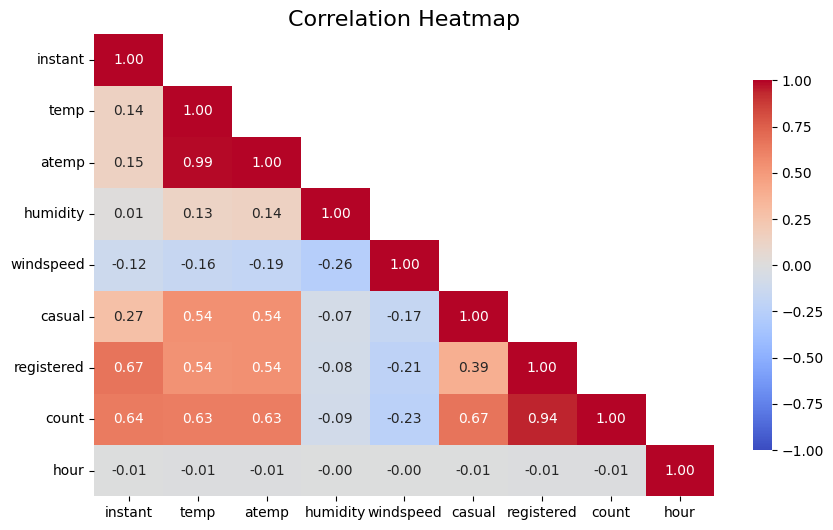

In [141]:
plt.figure(figsize=(10, 6))

num_cols = bike_sharing_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_cols.corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
                      vmin=-1, vmax=1, mask=np.triu(corr_matrix, k=1), cbar_kws={'shrink': 0.8})
heatmap.set_title('Correlation Heatmap', fontsize=16)


Berdasarkan heatmap korelasi di atas, diperoleh kesimpulan:

* temp dan atemp sangat berkorelasi (0.99), menunjukkan kesamaan keduanya.
* humidity memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
* windspeed berkorelasi negatif dengan temp (-0.16), atemp (-0.19), dan humidity (-0.26).
* casual cukup berkorelasi dengan temp dan atemp (0.54) serta berkorelasi negatif dengan humidity (-0.07) dan windspeed (-0.17).
* registered menunjukkan pola yang sama dengan casual dan berkorelasi moderat dengannya (0.39).
* count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.94), serta berkorelasi negatif dengan humidity (-0.09) dan windspeed (-0.23).
* hour tidak memiliki korelasi signifikan dengan variabel lain

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca memengaruhi tingkat penggunaan layanan penyewaan sepeda?

In [148]:
df_weathercond = bike_sharing_df.groupby('weather_condition')['instant'].nunique().reset_index()
df_weathercond.rename(columns={'instant': 'sum'}, inplace=True)
df_weathercond

<ipython-input-148-73f06e3d81ee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weathercond = bike_sharing_df.groupby('weather_condition')['instant'].nunique().reset_index()


,weather_condition,sum
0,Clear,463
1,Mist & Cloudy,247
2,Light Snow/Rain,21


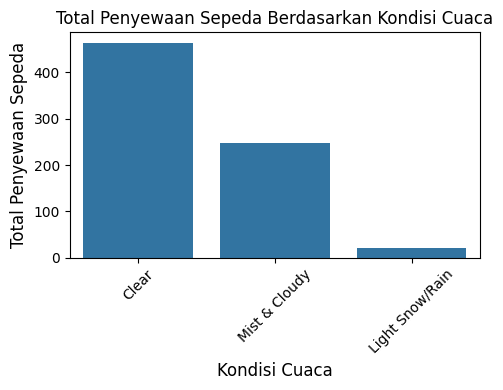

In [144]:
# Membuat grafik batang untuk menggambarkan total penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_weathercond.sort_values('weather_condition', ascending=False),
    x='weather_condition',
    y='sum'
)

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

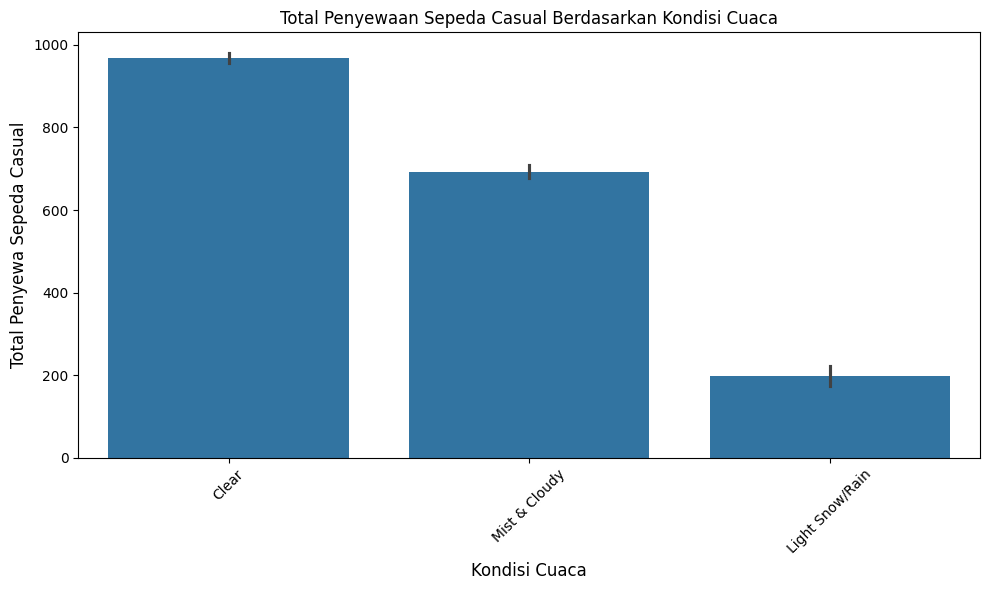

In [145]:
# Membuat grafik batang untuk menggambarkan jumlah penyewaan sepeda casual berdasarkan kondisi cuaca
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_condition',
    y='casual',
    data=bike_sharing_df
)

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda Casual Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Penyewa Sepeda Casual', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

pengguna penyewa sepeda dengan kategori casual lebih menyukai kondisi cuaca yang cerah atau cleary

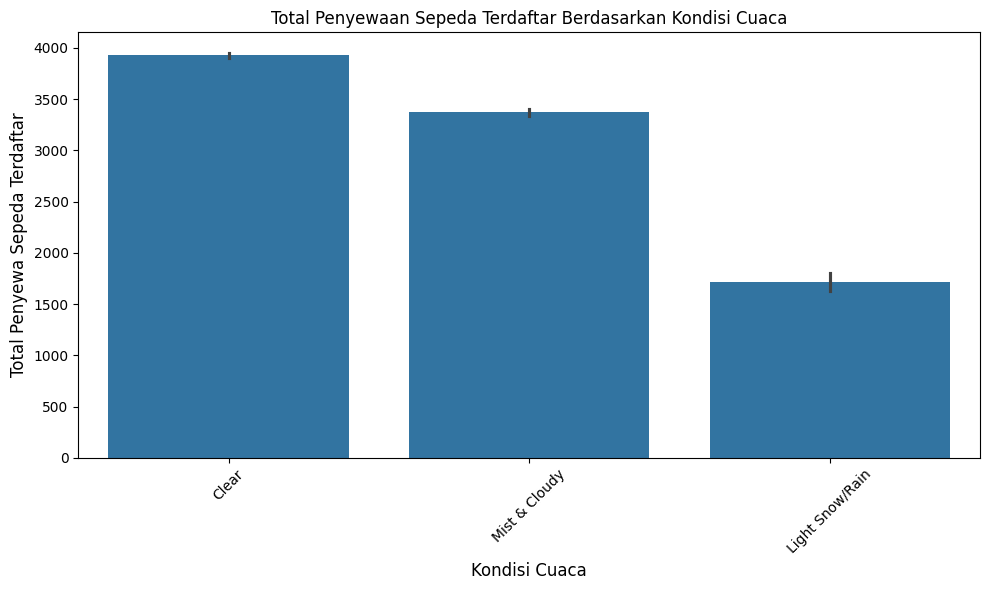

In [149]:
# Membuat grafik batang untuk menggambarkan jumlah penyewaan sepeda yang terdaftar (registered) berdasarkan kondisi cuaca
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_condition',
    y='registered',
    data=bike_sharing_df
)

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda Terdaftar Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Penyewa Sepeda Terdaftar', fontsize=12)
plt.xticks(rotation=45)  # Agar label kondisi cuaca lebih mudah dibaca
plt.tight_layout()

# Menampilkan grafik
plt.show()

pengguna penyewa sepeda dengan kategori registered lebih menyukai kondisi cuaca yang cerah atau cleary

### Pertanyaan 2: Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?


In [150]:
df_workingday = bike_sharing_df.groupby('workingday').instant.nunique().reset_index()
df_workingday.rename(columns={'instant': 'sum'}, inplace=True)
df_workingday

<ipython-input-150-288a452dad51>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_workingday = bike_sharing_df.groupby('workingday').instant.nunique().reset_index()


,workingday,sum
0,Non-Working Day,231
1,Working Day,500


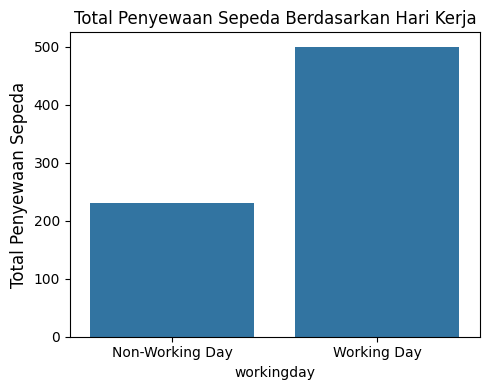

In [154]:
# Membuat grafik batang untuk menggambarkan total penyewaan sepeda berdasarkan hari kerja
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_workingday.sort_values('workingday', ascending=False),
    x = 'workingday',
    y = 'sum',
)

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.tight_layout()

# Menampilkan grafik
plt.show()

hasil visual menunjukkan bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja (working day)

### Pertanyaan 3: Bagaimana pengaruh status hari libur terhadap jumlah penyewaan sepeda (bike sharing)?

In [155]:
df_holiday = bike_sharing_df.groupby('holiday').instant.nunique().reset_index()
df_holiday.rename(columns={'instant': 'sum'}, inplace=True)
df_holiday

<ipython-input-155-8faf8f27a4ee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_holiday = bike_sharing_df.groupby('holiday').instant.nunique().reset_index()


,holiday,sum
0,Non-holiday Day,710
1,Holiday Day,21


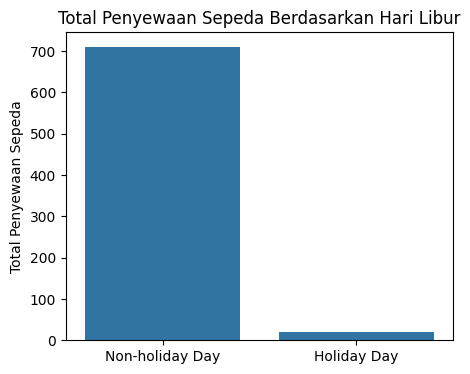

In [156]:
# Membuat grafik batang untuk menggambarkan total penyewaan sepeda berdasarkan hari libur
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_holiday.sort_values('holiday', ascending=False),
    x = 'holiday',
    y = 'sum',
)

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda Berdasarkan Hari Libur')
plt.xlabel(None)
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

 menunjukkan bahwa jumlah penyewaan sepeda jauh lebih tinggi pada hari non-libur dibandingkan pada hari libur.

memvisualisasikan bagaimana jumlah penyewaan sepeda (bike sharing) berbeda tergantung pada apakah itu hari kerja, hari libur, atau berdasarkan hari dalam minggu. Dengan membandingkan masing-masing kategori, kita bisa melihat pola penyewaan sepeda berdasarkan waktu.

<ipython-input-160-da1b5396223b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax0 = sns.barplot(x='workingday', y='count', data=bike_sharing_df, ax=axes[0], ci=None, palette='Blues_d')
<ipython-input-160-da1b5396223b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x='workingday', y='count', data=bike_sharing_df, ax=axes[0], ci=None, palette='Blues_d')
<ipython-input-160-da1b5396223b>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='holiday', y='count', data=bike_sharing_df, ax=axes[1], ci=None, palette='Oranges_d')
<ipython-input-160-da1b5396223b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

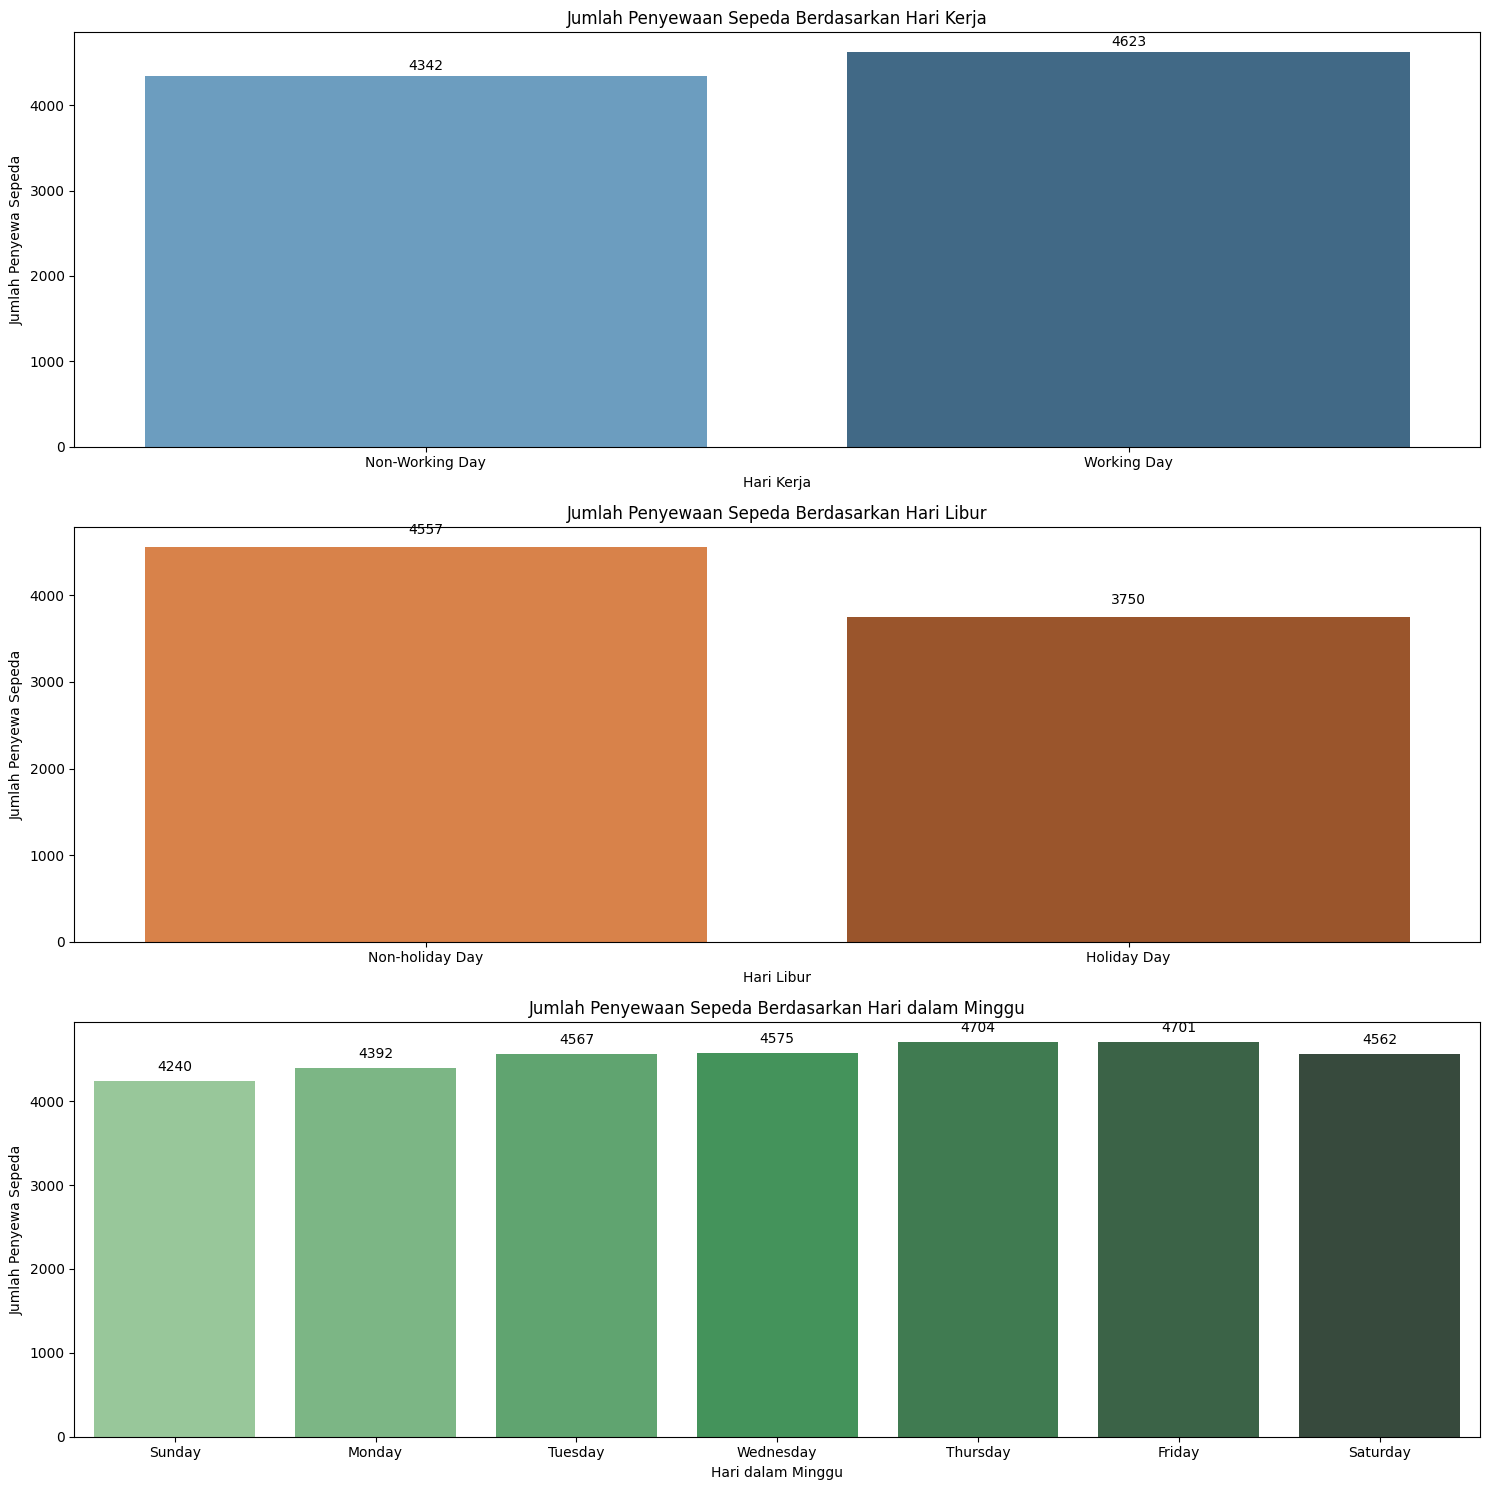

In [160]:
# Membuat subplot untuk visualisasi data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Berdasarkan status hari kerja (workingday)
ax0 = sns.barplot(x='workingday', y='count', data=bike_sharing_df, ax=axes[0], ci=None, palette='Blues_d')
ax0.set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
ax0.set_xlabel('Hari Kerja')
ax0.set_ylabel('Jumlah Penyewa Sepeda')

# Menambahkan nilai pada setiap bar di subplot pertama
for p in ax0.patches:
    ax0.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 7), textcoords='offset points')

# Berdasarkan hari libur (holiday)
ax1 = sns.barplot(x='holiday', y='count', data=bike_sharing_df, ax=axes[1], ci=None, palette='Oranges_d')
ax1.set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari Libur')
ax1.set_xlabel('Hari Libur')
ax1.set_ylabel('Jumlah Penyewa Sepeda')

# Menambahkan nilai pada setiap bar di subplot kedua
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 12), textcoords='offset points')

# Berdasarkan hari dalam minggu (weekday)
ax2 = sns.barplot(x='weekday', y='count', data=bike_sharing_df, ax=axes[2], ci=None, palette='Greens_d')
ax2.set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Minggu')
ax2.set_xlabel('Hari dalam Minggu')
ax2.set_ylabel('Jumlah Penyewa Sepeda')

# Menambahkan nilai pada setiap bar di subplot ketiga
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 10), textcoords='offset points')

# Menyesuaikan layout agar tidak ada bagian yang terpotong
plt.tight_layout()
plt.show()


Berdasarkan visualisasi data di atas, pernyataan berikut dapat diambil:

1. **Hari Kerja (Working Day)**, seperti Senin hingga Jumat, menunjukkan jumlah penyewa sepeda yang lebih banyak dibandingkan dengan **Akhir Pekan (Holiday)** yang mencakup Sabtu dan Minggu.
2. **Hari Biasa (Non-Holiday)**, yang tidak termasuk dalam kategori hari libur, memiliki jumlah penyewa sepeda yang jauh lebih tinggi dibandingkan dengan hari yang dianggap **Libur (Holiday)**.
3. **Hari Kamis** mencatatkan jumlah penyewa sepeda tertinggi, menempati posisi pertama, sementara **Hari Minggu** berada di posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

Dari sini, dapat disimpulkan bahwa pola penggunaan sepeda berbasis waktu lebih cenderung meningkat pada hari kerja dan hari biasa, sementara penurunan jumlah terjadi pada akhir pekan atau hari libur.

## Conclusion

* **Conclusion Pertanyaan 1:**

1. Berdasarkan hasil visualisasi yang menggambarkan jumlah penyewa sepeda menurut kondisi cuaca (`weather_condition`), terlihat bahwa baik pengguna biasa (`casual`) maupun pengguna terdaftar (`registered`) lebih banyak menyewa sepeda pada cuaca cerah (**clear**). Pada cuaca ini, pengguna `casual` tercatat sekitar 800 hingga 1.000 penyewa, sementara `registered` berkisar antara 3.500 hingga 4.000 penyewa.

2. Sebaliknya, pada kondisi cuaca **Light Snow**, jumlah penyewa sepeda cenderung lebih sedikit. Hal ini dapat dipahami dari aspek keselamatan karena jalan yang licin dan dari kenyamanan tubuh yang terganggu akibat suhu rendah dan angin kencang.


---


* **Conclusion Pertanyaan 2 dan 3:**

Berdasarkan visualisasi data menggunakan **barplot**, dapat disimpulkan sebagai berikut:

1. Dalam konteks **hari kerja (`workingday`)**, jumlah penyewa sepeda lebih tinggi pada hari kerja (Senin hingga Jumat) dengan total 4.623 penyewa, dibandingkan dengan akhir pekan (`Holiday`) yang hanya mencatatkan 4.342 penyewa sepeda (Sabtu dan Minggu).

2. Mengenai **hari libur (`holiday`)**, terlihat bahwa jumlah penyewa sepeda pada hari biasa (`Not Holiday`) jauh lebih banyak, dengan angka 4.557 penyewa, dibandingkan dengan hari libur (`Holiday`) yang hanya 3.750 penyewa sepeda.

3. Berdasarkan **hari dalam seminggu (`weekday`)**, hari **Kamis** mencatatkan jumlah penyewa sepeda terbanyak dengan total 4.704 penyewa, sementara **Minggu** berada di urutan terakhir dengan hanya 4.240 penyewa sepeda.

In [161]:
bike_sharing_df.to_csv("dataclean_bikesharing.csv", index=False)